# **Introduction**
Credit cards are one of the most commonly used financial tools. However, obtaining a credit card can be a difficult task for many individuals due to various factors such as income level, and employment status. To help streamline the application process and improve the approval rate, machine learning models can be used to predict credit card approval. In this project, we will explore how various factors affect credit card approval rates and use predictive models to improve the accuracy of credit card approval predictions.

# **1. Section**
###   **1. Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?**
  The proposal to predict credit card approval is highly relevant in today's world due to the increasing use of credit cards as a financial tool. With the rise in e-commerce and online transactions, credit cards have become a primary payment method for many individuals, making it essential for banks to efficiently process credit card applications and improve the approval rate. Predicting a good client is essential for a bank because it helps to minimize the risk of credit default and reduce the cost of managing credit card accounts. Banks can use machine learning algorithms to analyze various factors such as income level, employment status etc. By accurately predicting, banks can offer credit cards to clients with lower risk profiles, which can ultimately lead to better profitability and improved customer satisfaction.


### **2.How is it going to impact the banking sector?**

predicting credit card approval using machine learning can have a transformative impact on the banking sector by improving the customer experience, reducing risk, and increasing profitability.

**Improved customer experience:** By using predictive models, banks can offer faster and more accurate credit card approvals, which can improve the overall customer experience. This can lead to increased customer satisfaction and loyalty.

**Reduced risk of credit defaults:** Machine learning algorithms can help banks to accurately predict the likelihood of a client defaulting on their credit card payments. By identifying clients with lower credit risk profiles, banks can offer credit cards with lower interest rates, which can reduce the risk of defaults and ultimately improve the bank's profitability.

**Some Insights:**Banks can get an idea of how Annual Income,Type_occupation will be used for Approval,How these may be correlated with target variable,and even though of having high income why the approval is not there for this they may look after the previous loans or checking In and Out transactions they come to know the customer behaviour by these insights.

**Improved profitability:** By reducing the risk of credit defaults and improving the efficiency of the underwriting process, banks can increase their profitability. This can help banks to offer better rates and benefits to their clients, leading to increased market share and revenue.¶

### **3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.¶**

If there is a gap in the knowledge or process used by a bank in India for credit card approval, the proposed method can be helpful for banks in India by improving the accuracy of credit card approval predictions, enhancing credit risk management strategies, and improving efficiency. However, to fully leverage the benefits of our proposed method, If the dataset may contains  CIBIL score it can be more helpful for analyzing why there will be decrement in the approval rate even the Annual income is good and the banks that need to ensure they need to access to reliable and comprehensive data sources.

# **Section 2: Initial Hypothesis (or hypotheses)**

 **Assumptions:**

**Null Hypothesis** : 1. If Annual_Income is high,There is High chance of getting  Approval of Credit card.
      
      
2. RandomForest Algorithm gives good accuracy compaired with XGBOOST,Decision Tree,Logistic Regession

            

# **Section 3: Data analysis approach**

**2. What feature engineering techniques will be relevant to your project?**

Feature engineering Techinques:

1.I used here filter method that is correlation to see how the variables are correlated to target variable

**3. Please justify your data analysis approach**.

**4. Identify important patterns in your data using the EDA approach to justify your findings** .



In [85]:
# importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [86]:
a = pd.read_csv(r"/content/Credit_card.csv")# loading first(credit card) data
a.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [87]:
b = pd.read_csv(r"/content/Credit_card_label.csv")
b.head(2)

,Ind_ID,label
0,5008827,1
1,5009744,1


In [88]:
#merging of 2 datasets as data
data1 = pd.merge(a,b,on="Ind_ID",how = "inner")
data1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [89]:

data1.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [90]:
# number of observations and variables
data1.shape

(1548, 19)

## **Preprocessing**

In [91]:
## Preprocessing Renaming the Column Headers
data1 = data1.rename(columns = {'Ind_ID':"Ind_ID",'GENDER':'Gender','CHILDREN':'Children','Annual_income':'Annual_Income','EDUCATION':'Education','Housing_type':'Housing_Type',
                              'Birthday_count':'Birthday_Count','EMAIL_ID':'Email_Id','Type_Occupation':'Occupation_Type','label':'Label'})


In [92]:
data1.head()

,Ind_ID,Gender,Car_Owner,Propert_Owner,Children,Annual_Income,Type_Income,Education,Marital_status,Housing_Type,Birthday_Count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_Id,Occupation_Type,Family_Members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [93]:
## checking duplicates in the data
data1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1543    False
1544    False
1545    False
1546    False
1547    False
Length: 1548, dtype: bool

In [94]:
# if Yes Removing the duplicates
data1.drop_duplicates().head()

,Ind_ID,Gender,Car_Owner,Propert_Owner,Children,Annual_Income,Type_Income,Education,Marital_status,Housing_Type,Birthday_Count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_Id,Occupation_Type,Family_Members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [95]:
## statistical information
data1.describe()

,Ind_ID,Children,Annual_Income,Birthday_Count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_Id,Family_Members,Label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [96]:
## getting information about data
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_Income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_Type     1548 non-null   object 
 10  Birthday_Count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_Id         1548 non-null   int64  
 16  Occupation_Type  1060 non-null   object 
 17  Family_Members

In [97]:
## getting information about data
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_Income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_Type     1548 non-null   object 
 10  Birthday_Count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_Id         1548 non-null   int64  
 16  Occupation_Type  1060 non-null   object 
 17  Family_Members

<Axes: >

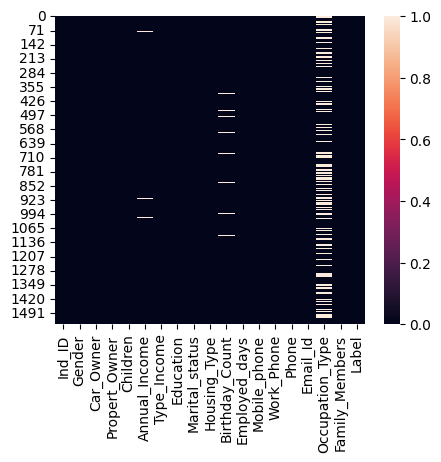

In [98]:

## Understanding the missing values better in the visual by using heatmap
plt.figure(figsize=(5,4))
sns.heatmap(data1.isnull())

In [99]:
## Replacing the missing values
data1['Annual_Income'].fillna(data1['Annual_Income'].median(),inplace = True)
data1['Birthday_Count'].fillna(data1['Birthday_Count'].median(),inplace = True)
data1['Occupation_Type'].fillna('Other',inplace = True)
data1['Gender'].mode()
data1['Gender'].fillna("F",inplace = True)

In [100]:
data1.isnull().sum()

Ind_ID             0
Gender             0
Car_Owner          0
Propert_Owner      0
Children           0
Annual_Income      0
Type_Income        0
Education          0
Marital_status     0
Housing_Type       0
Birthday_Count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
Email_Id           0
Occupation_Type    0
Family_Members     0
Label              0
dtype: int64

In [101]:

data1.shape

(1548, 19)

In [102]:

## converting negative to positive
data1['Birthday_Count'] = abs(round((data1['Birthday_Count']/-365),0))
data1['Employed_days'] = abs(round((data1['Employed_days']/-365),0))

In [103]:
data1.head()

,Ind_ID,Gender,Car_Owner,Propert_Owner,Children,Annual_Income,Type_Income,Education,Marital_status,Housing_Type,Birthday_Count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_Id,Occupation_Type,Family_Members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,1001.0,1,0,0,0,Other,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Other,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43.0,2.0,1,1,1,0,Other,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Other,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Other,2,1


In [104]:
## replacing extreme value to 0
data1['Employed_days'].replace(1001.0, 0,inplace=True)
data1.head()

,Ind_ID,Gender,Car_Owner,Propert_Owner,Children,Annual_Income,Type_Income,Education,Marital_status,Housing_Type,Birthday_Count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_Id,Occupation_Type,Family_Members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,Other,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Other,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43.0,2.0,1,1,1,0,Other,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Other,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Other,2,1


## **Feature Enginerring**

In [105]:
data1.head()

,Ind_ID,Gender,Car_Owner,Propert_Owner,Children,Annual_Income,Type_Income,Education,Marital_status,Housing_Type,Birthday_Count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_Id,Occupation_Type,Family_Members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,Other,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Other,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43.0,2.0,1,1,1,0,Other,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Other,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Other,2,1


In [106]:
data1.corr()

,Ind_ID,Children,Annual_Income,Birthday_Count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_Id,Family_Members,Label
Ind_ID,1.000000,0.032535,0.031019,-0.021998,0.009371,NaN,0.085794,0.008403,-0.037923,0.016950,0.016796
Children,0.032535,1.000000,0.078543,-0.276760,0.073313,NaN,0.035014,-0.004908,0.025776,0.890248,-0.021646
Annual_Income,0.031019,0.078543,1.000000,-0.110321,0.052665,NaN,-0.070944,-0.006965,0.122354,0.051522,0.024425
Birthday_Count,-0.021998,-0.276760,-0.110321,1.000000,-0.022544,NaN,-0.172522,0.027918,-0.166067,-0.263543,0.044925
Employed_days,0.009371,0.073313,0.052665,-0.022544,1.000000,NaN,0.120323,0.034776,-0.036962,0.092535,-0.095189
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.085794,0.035014,-0.070944,-0.172522,0.120323,NaN,1.000000,0.352439,-0.009594,0.072228,-0.007046
Phone,0.008403,-0.004908,-0.006965,0.027918,0.034776,NaN,0.352439,1.000000,0.018105,0.005372,-0.000664
Email_Id,-0.037923,0.025776,0.122354,-0.166067,-0.036962,NaN,-0.009594,0.018105,1.000000,0.035098,0.012921
Family_Members,0.016950,0.890248,0.051522,-0.263543,0.092535,NaN,0.072228,0.005372,0.035098,1.000000,-0.030709


In [107]:
## Removing the Unwanted variables
data1 = data1.drop(columns = ['Ind_ID','Mobile_phone','Work_Phone','Phone','Email_Id'])

In [ ]:
data1.columns

Index(['Ind_ID', 'Gender', 'Car_Owner', 'Propert_Owner', 'Children',
       'Annual_Income', 'Type_Income', 'Education', 'Marital_status',
       'Housing_Type', 'Birthday_Count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'Email_Id', 'Occupation_Type', 'Family_Members',
       'Label'],
      dtype='object')

## **Univariate Analysis**

<Axes: xlabel='Annual_Income', ylabel='Count'>

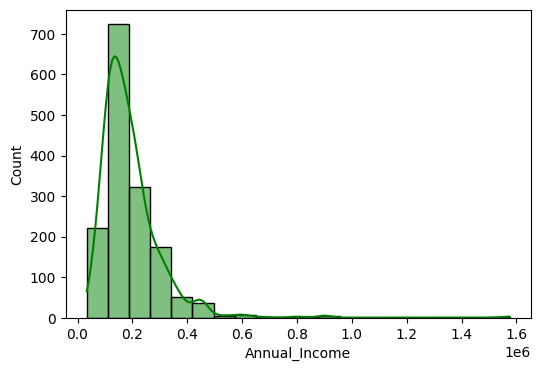

In [ ]:
## distribution of  Annual income
plt.figure(figsize=(6,4))
sns.histplot(data1['Annual_Income'],kde = True,color = 'Green',bins = 20)

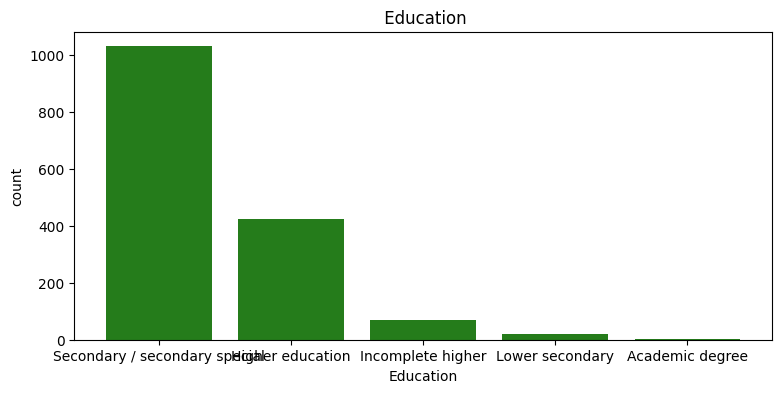

In [ ]:
### in each type of education count
Education_count=data1['Education'].value_counts()
plt.figure(figsize=(9,4))
plt.bar(Education_count.index,Education_count.values,color = '#257C1B')
plt.xlabel('Education')
plt.ylabel('count')
plt.title(' Education')
plt.show()


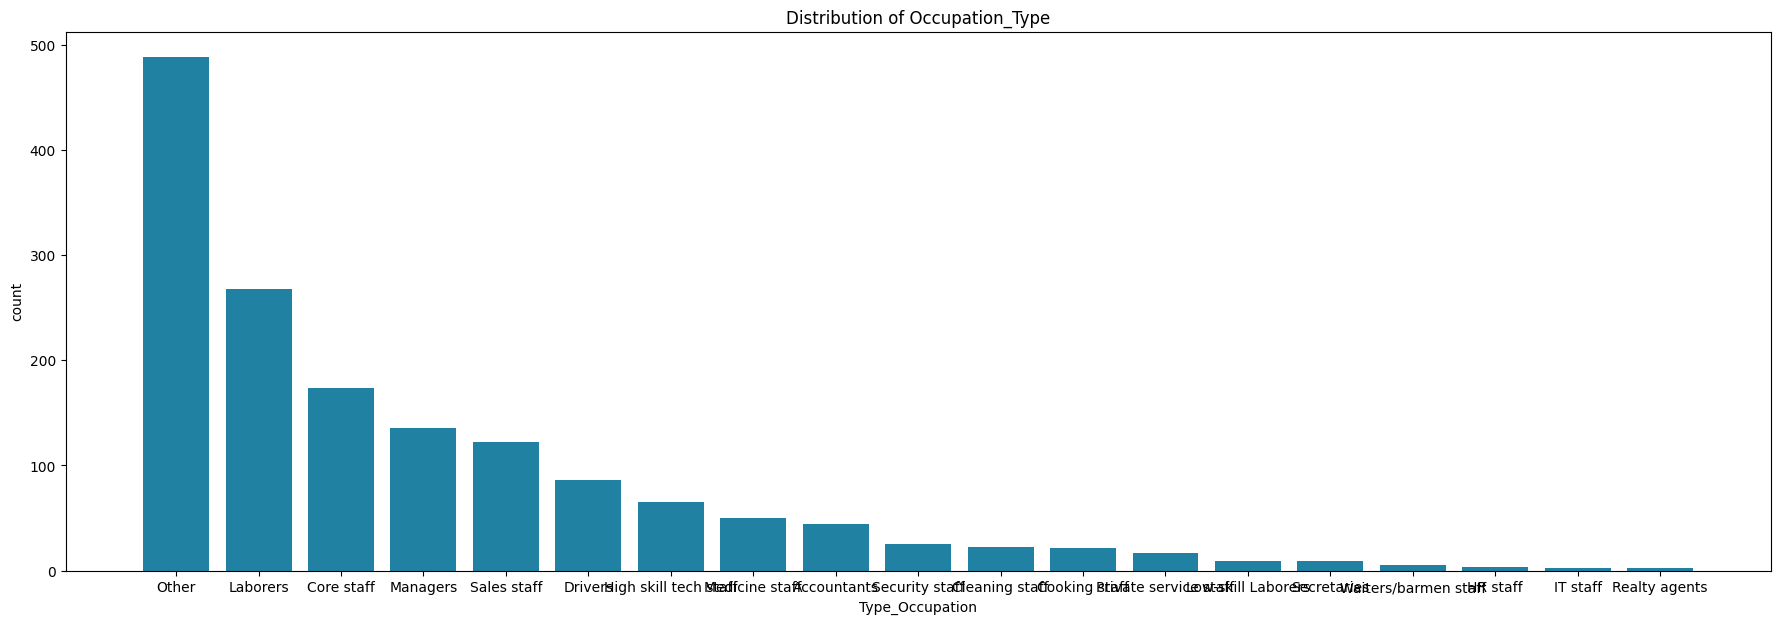

In [ ]:
# count number of Type_Occupation
Occupation_Type_count=data1['Occupation_Type'].value_counts()
plt.figure(figsize=(22,7)) #creat barpolt using Matplotlib
plt.bar(Occupation_Type_count.index,Occupation_Type_count.values,color = '#2181A3')
plt.xlabel('Type_Occupation')
plt.ylabel('count')
plt.title('Distribution of Occupation_Type')
plt.show()

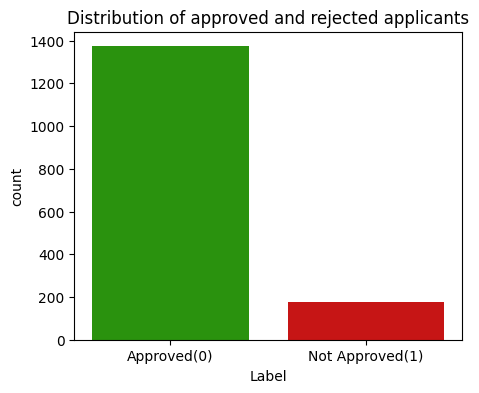

In [ ]:
Label_count=data1['Label'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(5,4))
colors = ['#2A920E', '#C61515']
plt.bar(Label_count.index,Label_count.values,color = colors,tick_label= ["Approved(0)","Not Approved(1)"])
plt.xlabel('Label')
plt.ylabel('count')
plt.title('Distribution of approved and rejected applicants')
plt.show()


## **Bivariate Analysis**

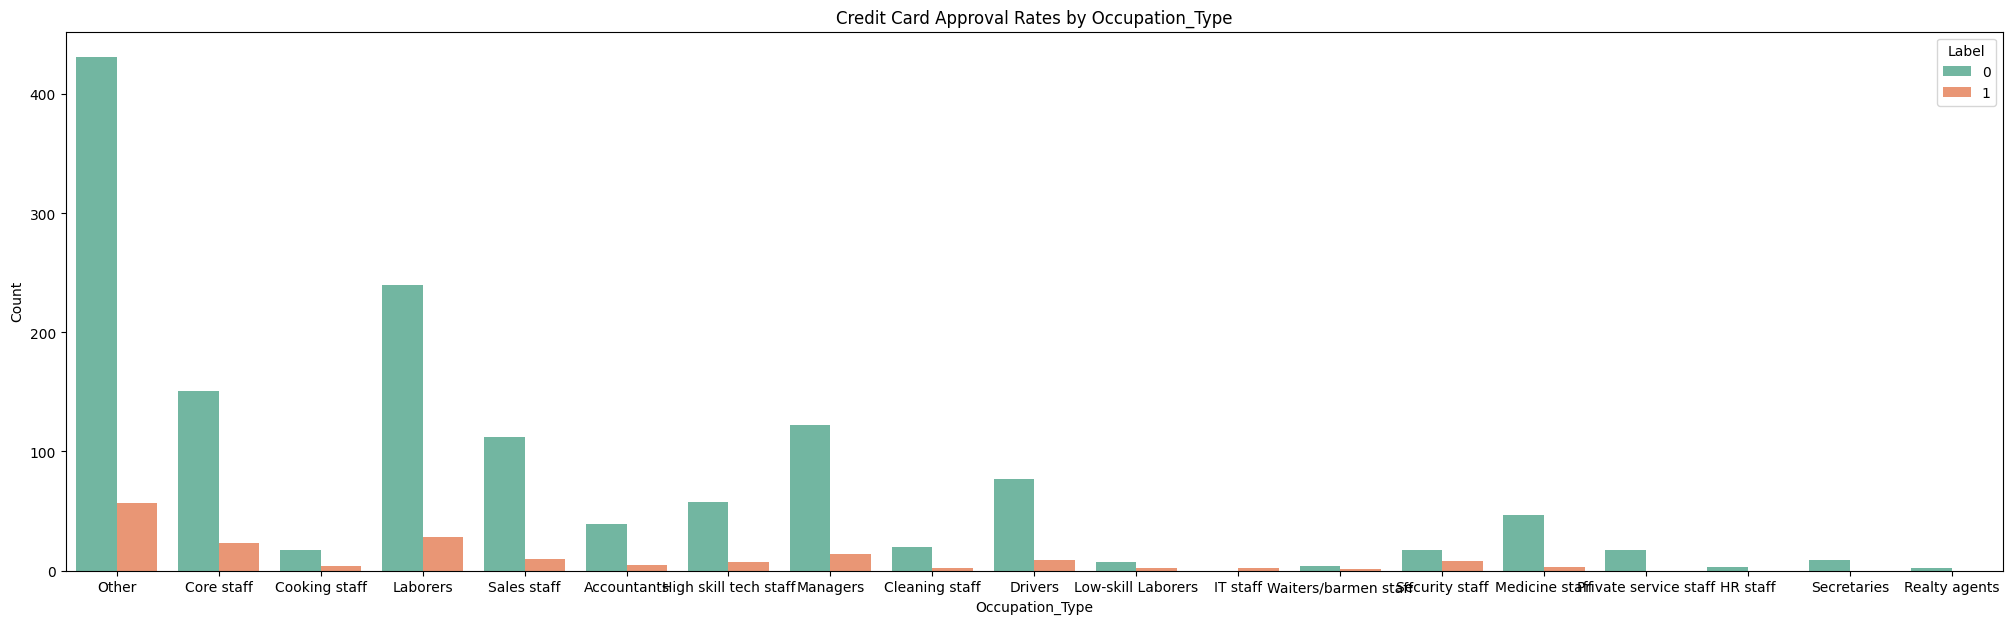

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(x='Occupation_Type', hue='Label', data=data1,palette='Set2')
plt.xlabel('Occupation_Type')
plt.ylabel('Count')
plt.title('Credit Card Approval Rates by Occupation_Type')
plt.show()

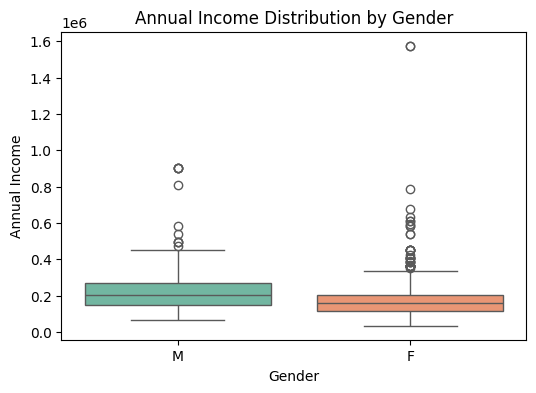

In [ ]:
plt.figure(figsize=(6,4))

sns.boxplot(x='Gender', y='Annual_Income', data=data1,palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.title('Annual Income Distribution by Gender')
plt.show()

**Relation Between Annual Income and Approval (Label)**

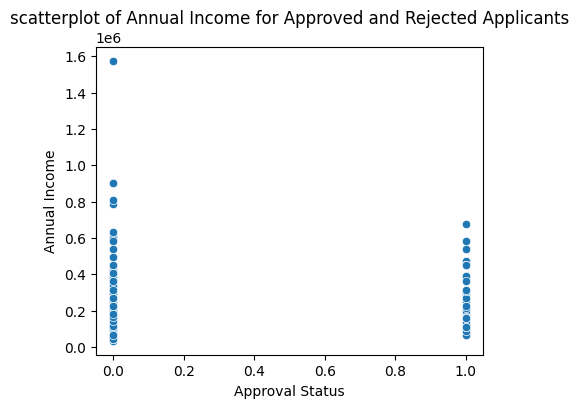

In [ ]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='Label', y='Annual_Income', data=data1)
plt.xlabel('Approval Status')
plt.ylabel('Annual Income')
plt.title('scatterplot of Annual Income for Approved and Rejected Applicants')
plt.show()

**Performing T test between Annual_Income and Target Variable to decide whether to accept the null hypothesis or reject the null**

In [ ]:
from scipy.stats import ttest_rel,ttest_ind
rel_ttest = ttest_rel(a=data1["Annual_Income"],b=data1["Label"])
print(rel_ttest)

TtestResult(statistic=66.83937438966929, pvalue=0.0, df=1547)


**Initially Our hypothesis is If Annual_Income is high,There is High chance of  getting Approval of Credit card.The T test is performed only if we unknown the sigma and two groups are related to each other.Based on the T test which is performed in between target variable and annual income the p value is less than 0.05 hence we reject the null hypothesis H0,we accept the alternative hypothesis H1.**

In [ ]:
data1['Label'].value_counts()

0    1373
1     175
Name: Label, dtype: int64

## **Label Encoding**

In [112]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data1:
    if data1[i].dtype  == 'object':
        data1[i] = le.fit_transform(data1[i])

In [113]:
data1.head()

,Gender,Car_Owner,Propert_Owner,Children,Annual_Income,Type_Income,Education,Marital_status,Housing_Type,Birthday_Count,Employed_days,Occupation_Type,Family_Members,Label
0,1,1,1,0,180000.0,1,1,1,1,51.0,0.0,12,2,1
1,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,12,2,1
2,0,1,0,0,315000.0,0,1,1,1,43.0,2.0,12,2,1
3,0,1,0,0,166500.0,0,1,1,1,37.0,2.0,12,2,1
4,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,12,2,1


 **Defining Independent(X) varibales and dependent(Y) Variables
Spliting the training and testing data**.

In [114]:
from sklearn.model_selection import train_test_split
X = data1.iloc[:,0:-1]
Y = data1.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.20,random_state = 10)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1238, 13) (1238,)
(310, 13) (310,)


In [115]:
import sklearn.preprocessing

In [ ]:
print(dir(sklearn.preprocessing))

['Binarizer', 'FunctionTransformer', 'KBinsDiscretizer', 'KernelCenterer', 'LabelBinarizer', 'LabelEncoder', 'MaxAbsScaler', 'MinMaxScaler', 'MultiLabelBinarizer', 'Normalizer', 'OneHotEncoder', 'OrdinalEncoder', 'PolynomialFeatures', 'PowerTransformer', 'QuantileTransformer', 'RobustScaler', 'SplineTransformer', 'StandardScaler', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_csr_polynomial_expansion', '_data', '_discretization', '_encoders', '_function_transformer', '_label', '_polynomial', 'add_dummy_feature', 'binarize', 'label_binarize', 'maxabs_scale', 'minmax_scale', 'normalize', 'power_transform', 'quantile_transform', 'robust_scale', 'scale']


## **Scaling**

In [116]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
x_train_norm = SS.fit_transform(x_train)
x_test_norl = SS.fit_transform(x_test)
print(x_train_norm)
print(x_test_norl)
print("\n",x_train_norm.shape)
print(x_test_norl.shape)

[[-0.76494918  1.20477597  0.72690788 ... -0.32755583 -1.47192526
   0.97110487]
 [ 1.30727639  1.20477597  0.72690788 ...  0.27543914 -0.03160635
   0.97110487]
 [-0.76494918  1.20477597  0.72690788 ... -0.47830457 -1.71197841
  -0.16307233]
 ...
 [-0.76494918 -0.83002983  0.72690788 ... -0.47830457 -1.47192526
  -0.16307233]
 [ 1.30727639  1.20477597 -1.37569014 ... -0.32755583  0.6885531
  -0.16307233]
 [-0.76494918 -0.83002983  0.72690788 ...  1.33068034 -0.2716595
  -0.16307233]]
[[-0.74685269  1.26690253  0.74161985 ... -0.88628517  0.7120339
  -1.05207416]
 [ 1.33895212 -0.78932671  0.74161985 ... -0.88628517  0.7120339
  -0.1982967 ]
 [-0.74685269 -0.78932671  0.74161985 ... -0.41689724 -1.85188964
  -0.1982967 ]
 ...
 [-0.74685269 -0.78932671 -1.34839972 ... -0.88628517  0.7120339
  -1.05207416]
 [ 1.33895212  1.26690253  0.74161985 ...  0.20895334  0.24586598
  -0.1982967 ]
 [-0.74685269 -0.78932671 -1.34839972 ... -0.88628517  0.7120339
  -0.1982967 ]]

 (1238, 13)
(310, 13)

## **Handling with Imbalancing of Data Using UnderSampling**

In [118]:
data1['Label'].value_counts()

0    1373
1     175
Name: Label, dtype: int64

In [127]:
Approval = data1.query('Label == 0')
not_approval = data1.query('Label == 1')
Approval['Label'].value_counts(),not_approval['Label'].value_counts()

(0    1373
 Name: Label, dtype: int64,
 1    175
 Name: Label, dtype: int64)

In [131]:
balanced_df = pd.concat([Approval,not_approval.sample(len(not_approval),random_state =1)])

In [132]:
balanced_df['Label'].value_counts()

0    1373
1     175
Name: Label, dtype: int64

In [135]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X, Y)

In [136]:
y_resampled.value_counts()

0    175
1    175
Name: Label, dtype: int64

In [137]:
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(X_resampled, y_resampled, test_size=0.20,random_state = 1)
print(x_train_b.shape, y_train_b.shape)
print(x_test_b.shape, y_test_b.shape)

(280, 13) (280,)
(70, 13) (70,)


In [145]:
y_train_b.value_counts(),y_test_b.value_counts()

(0    142
 1    138
 Name: Label, dtype: int64,
 1    37
 0    33
 Name: Label, dtype: int64)

# **Building Up the models**

## **1.Logistic Regression**

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [256]:
LR = LogisticRegression()
LR.fit(x_train_b,y_train_b)

LogisticRegression()

In [257]:
lr_pred = LR.predict(x_test_b)
print("Training accuracy:",LR.score(x_train_b,y_train_b))
print(confusion_matrix(y_test_b,lr_pred))
print(classification_report(y_test_b,lr_pred))

Training accuracy: 0.5071428571428571
[[33  0]
 [37  0]]
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        33
           1       0.00      0.00      0.00        37

    accuracy                           0.47        70
   macro avg       0.24      0.50      0.32        70
weighted avg       0.22      0.47      0.30        70



# **Hyperparameter Tunning**

In [258]:
# Define hyperparameter grid
param_grid = {
    'C': [1,10],          # Regularization parameter
    'penalty': ['l1', 'l2'],                     # Type of regularization
    'solver': ['liblinear'] # Optimization algorithm
}

In [259]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy')
# Fit the model to the training data
grid_search.fit(x_train_b, y_train_b)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [260]:
grid_search.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [261]:
LR = LogisticRegression(C = 1,penalty =  'l1', solver = 'liblinear')
LR.fit(x_train_b,y_train_b)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [262]:
pred_lr = LR.predict(x_test_b)
print("Training Accuraccy:",LR.score(x_train_b,y_train_b))
print("Testing Accuracy:",LR.score(x_test_b,y_test_b))
print(confusion_matrix(y_test_b,pred_lr))
print(classification_report(y_test_b,pred_lr))


Training Accuraccy: 0.7642857142857142
Testing Accuracy: 0.6
[[21 12]
 [16 21]]
              precision    recall  f1-score   support

           0       0.57      0.64      0.60        33
           1       0.64      0.57      0.60        37

    accuracy                           0.60        70
   macro avg       0.60      0.60      0.60        70
weighted avg       0.60      0.60      0.60        70



### **Cross Validation for LogisticRegression**

---



In [263]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)
kf


KFold(n_splits=5, random_state=None, shuffle=True)

In [264]:
cross_val_scores = cross_val_score(LR, X_resampled,y_resampled, cv=kf, scoring='accuracy')
cross_val_scores

array([0.7       , 0.75714286, 0.72857143, 0.71428571, 0.68571429])

## **2. Decision Tree¶**

0        0.57      0.64      0.60        33

1       0.64      0.57      0.60        37

In [293]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=1)

In [294]:
DTC.fit(x_train_b,y_train_b)

DecisionTreeClassifier(random_state=1)

In [295]:
print(DTC.score(x_train_b,y_train_b))
dt_pred = DTC.predict(x_test_b)
print(accuracy_score(y_test_b,dt_pred))
confusion_matrix(y_test_b,dt_pred)
print(classification_report(y_test_b,dt_pred))

1.0
0.7428571428571429
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        33
           1       0.74      0.78      0.76        37

    accuracy                           0.74        70
   macro avg       0.74      0.74      0.74        70
weighted avg       0.74      0.74      0.74        70



### **Hyperparameter Tunning**

In [296]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "criterion" : ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_features" : ["auto", "sqrt", "log2"]}


In [297]:
grid_search = GridSearchCV(DTC, param_grid, cv=5, scoring='accuracy')
# Fit the model to the training data
grid_search.fit(x_train_b, y_train_b)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [298]:
grid_search.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}

In [299]:
DTC = DecisionTreeClassifier(criterion= 'gini', max_features= 'auto', splitter= 'best')

In [300]:
DTC.fit(x_train_b, y_train_b)

DecisionTreeClassifier(max_features='auto')

In [301]:
pred_dt = DTC.predict(x_test_b)
print("Training Score:",DTC.score(x_train_b, y_train_b))
print("Testing Score:",DTC.score(x_test_b,y_test_b))
print('Accuracy score:',accuracy_score(y_test_b,pred_dt),'\n')
print(confusion_matrix(y_test_b,pred_dt))
print(classification_report(y_test_b,pred_dt))

Training Score: 1.0
Testing Score: 0.7571428571428571
Accuracy score: 0.7571428571428571 

[[22 11]
 [ 6 31]]
              precision    recall  f1-score   support

           0       0.79      0.67      0.72        33
           1       0.74      0.84      0.78        37

    accuracy                           0.76        70
   macro avg       0.76      0.75      0.75        70
weighted avg       0.76      0.76      0.75        70



### **Cross Validation for DecisionTreeClassifier**

In [302]:
from sklearn.model_selection import cross_val_score,KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)
kf




KFold(n_splits=5, random_state=None, shuffle=True)

In [303]:
cross_val_scores = cross_val_score(DTC, X_resampled,y_resampled, cv=kf, scoring='accuracy')

In [304]:
cross_val_scores

array([0.7       , 0.8       , 0.72857143, 0.77142857, 0.78571429])

# **3. Random Forest**

In [305]:
from sklearn.ensemble import RandomForestClassifier

In [307]:
RFC = RandomForestClassifier(n_estimators = 150,random_state = 1)
RFC.fit(x_train_b, y_train_b)

RandomForestClassifier(n_estimators=150, random_state=1)

In [308]:
rt_pred = RFC.predict(x_test_b)

print('Training Accuracy:',RFC.score(x_train_b, y_train_b))
print('Testing Accuracy:',RFC.score(x_test_b,y_test_b))
print("Accuracy Score:",accuracy_score(y_test_b,rt_pred),'\n')
print(confusion_matrix(y_test_b,rt_pred),'\n')
print(classification_report(y_test_b,rt_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.7857142857142857
Accuracy Score: 0.7857142857142857 

[[21 12]
 [ 3 34]] 

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        33
           1       0.74      0.92      0.82        37

    accuracy                           0.79        70
   macro avg       0.81      0.78      0.78        70
weighted avg       0.80      0.79      0.78        70



**Cross Validation for Random Forest Classifier**

In [309]:
##importing the necessary modules
from sklearn.model_selection import cross_val_score,KFold
num_folds = 5## defing Folds
kf = KFold(n_splits=num_folds, shuffle=True)
kf

KFold(n_splits=5, random_state=None, shuffle=True)

In [310]:
cross_val_scores = cross_val_score(RFC, X_resampled,y_resampled, cv=kf, scoring='accuracy')
cross_val_scores ## printing the scores of different folds

array([0.78571429, 0.78571429, 0.78571429, 0.77142857, 0.8       ])

# **XGBOOST Classifier**

In [311]:
##importing the xgboost library
from xgboost import XGBClassifier

In [312]:

XGB = XGBClassifier()

In [313]:
XGB.fit(X_resampled,y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [314]:
## importing the necesary score metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
xgb_pred = XGB.predict(x_test_b)



In [316]:
print('Training Accuracy:',XGB.score(x_train_b,y_train_b))
print("Testing Accuracy:",XGB.score(x_test_b,y_test_b))
print('Accuracy Score',accuracy_score(y_test_b,xgb_pred),'\n')
print(confusion_matrix(y_test_b,xgb_pred),'\n')
print(classification_report(y_test_b,xgb_pred))

Training Accuracy: 1.0
Testing Accuracy: 1.0
Accuracy Score 1.0 

[[33  0]
 [ 0 37]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        37

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



### **Cross Validation for XGBOOST**

In [317]:
##importing the necessary modules
from sklearn.model_selection import cross_val_score,KFold
num_folds = 5## defing Folds
kf = KFold(n_splits=num_folds, shuffle=True)
kf


KFold(n_splits=5, random_state=None, shuffle=True)

In [318]:
cross_val_scores = cross_val_score(XGB, X_resampled,y_resampled, cv=kf, scoring='accuracy')
cross_val_scores ## printing the scores of different folds

array([0.77142857, 0.88571429, 0.81428571, 0.87142857, 0.81428571])

**ROC Curve (to show how our model is good-RandomForestClassifier)**

In [319]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 150)
RFC.fit(x_train_b,y_train_b)
from sklearn import metrics
pred = RFC.predict_proba(x_test_b)
df_res = pd.DataFrame(data=pred,columns=["0","1"])
df_res.head()

,0,1
0,0.173333,0.826667
1,0.580000,0.420000
2,0.680000,0.320000
3,0.546667,0.453333
4,0.086667,0.913333


In [320]:
import numpy as np
pred_final = np.where(df_res["0"]>0.6,1,0)
pred_final

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0])

In [321]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
cm = confusion_matrix(y_test_b,pred_final)
cm

array([[15, 18],
       [37,  0]])

In [322]:
sens = cm[1,1]/(cm[1,0]+cm[1,1])
spec = cm[0,0] / (cm[0,0]+ cm[0,1])
print(sens,spec)

0.0 0.45454545454545453


In [323]:
y_prob = RFC.predict_proba(x_test_b)[:,1]

In [324]:
fpr,tpr,threshold = roc_curve(y_test_b,y_prob)

In [325]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03030303, 0.03030303, 0.06060606, 0.06060606,
       0.09090909, 0.09090909, 0.15151515, 0.21212121, 0.21212121,
       0.24242424, 0.24242424, 0.27272727, 0.33333333, 0.33333333,
       0.45454545, 0.45454545, 0.87878788, 1.        ])

In [326]:
tpr

array([0.        , 0.02702703, 0.08108108, 0.18918919, 0.27027027,
       0.43243243, 0.45945946, 0.62162162, 0.62162162, 0.64864865,
       0.64864865, 0.7027027 , 0.75675676, 0.78378378, 0.81081081,
       0.83783784, 0.86486486, 0.86486486, 0.86486486, 0.91891892,
       0.91891892, 1.        , 1.        , 1.        ])

In [327]:
threshold

array([2.        , 1.        , 0.98      , 0.96666667, 0.96      ,
       0.87333333, 0.86666667, 0.74666667, 0.73333333, 0.72666667,
       0.7       , 0.66      , 0.64666667, 0.63333333, 0.59333333,
       0.58      , 0.57333333, 0.55333333, 0.54666667, 0.52      ,
       0.44      , 0.42      , 0.00666667, 0.        ])

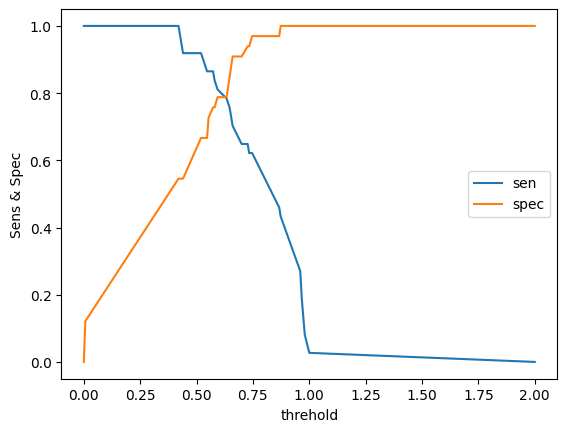

In [328]:
## finding out the Threshold
sen = tpr
spec = 1-fpr
import matplotlib.pyplot as plt
plt.plot(threshold,sen,label="sen")
plt.plot(threshold,spec,label="spec")
plt.xlabel("threhold")
plt.ylabel("Sens & Spec")
plt.legend()
plt.show()

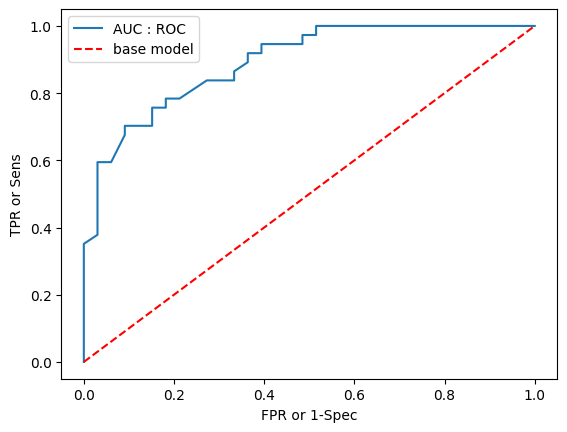

In [254]:

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="AUC : ROC")
plt.plot([0,1],[0,1], linestyle="--", color='red', label="base model")
plt.xlabel("FPR or 1-Spec")
plt.ylabel("TPR or Sens")
plt.legend()
plt.show()

# **Comparison among models**

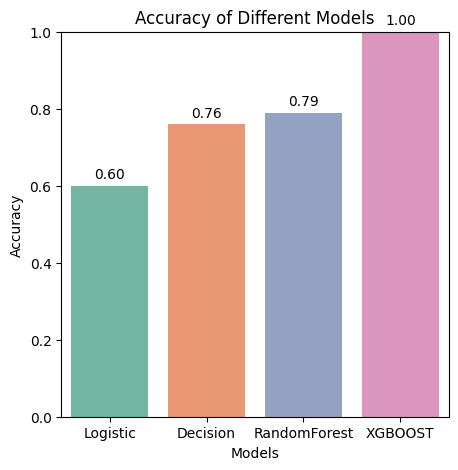

In [330]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['Logistic', 'Decision', 'RandomForest','XGBOOST']
accuracies = [0.60, 0.76, 0.79,1.0]

# Plotting the bar graph
plt.figure(figsize=(5,5))
sns.barplot(x = model_names,y = accuracies,palette='Set2')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set the y-axis limits to the range of accuracy (0 to 1)

# Display the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()

# **Project Summary**
# ***Introduction***
Credit cards are one of the most commonly used financial tools. However, obtaining a credit card can be a difficult task for many individuals due to various factors such as income level, and employment status. To help streamline the application process and improve the approval rate, machine learning models can be used to predict credit card approval. In this project, we will explore how various factors affect credit card approval rates and use predictive models to improve the accuracy of credit card approval predictions.

## ***Variable Descriptions***

**Gender:** This column indicates the gender of the individual, either male or female. It is a Categorical (binary).

**Car_Owner:** This column indicates whether the individual owns a car or not, either Yes or No.It is a Categorical (binary).

**Propert_Owner:** This column indicates whether the individual owns a property or not, either Yes or No.It is a Categorical (binary).

**Children:** This column indicates the number of children the individual has.It is a Numerical(integer).

**Annual_income**: This column contains the annual income of the individual.It is a Numerical (continuous).

**Type_Income:** This column indicates the type of income the individual earns, such as salary or self-employed income.It is a Numerical (nominal).

**Education:** This column indicates the level of education of the individual. It is a Categorical (ordinal).

**Marital_status:** This column indicates the marital status of the individual, such as Single, Married, Divorced, etc. It is a Categorical (nominal).

**Housing_type** This column indicates the type of housing the individual lives in, such as a house or apartment. It is a Categorical (nominal).

**Birthday_count**: This column contains the age of the individual.It is a Numerical(integer).

**Employed_days**: This column indicates the number of days the individual has been employed.It is a Numerical(integer).

**Mobile_phone**, Work_Phone, Phone, and Email_id: These columns contain contact information for the individual, such as mobile phone number, work phone number, home phone number, and email id.Mobile_phone, Work_Phone, Phone are Categorical (binary) and Email_id is Categorical (nominal).

**Type_Occupation**: This column indicates the type of occupation of the individual, such as healthcare or education. It is a Categorical (nominal).

**Family_Members**: This column indicates the number of family members the individual has.It is a Numeric (integer).

**Label**: This column contains the label for credit card approval, either approved or not approved. It is a Categorical (binary).

## **Objective:**
The project aims to develop a credit card approval system that automates the application review process, making it efficient and consistent. The system evaluates applicants based on their financial history, and other relevant factors to determine creditworthiness.

**Data Collection:** Gathered historical data on credit card applicants, including personal information, financial records.Imported the files by using pandas and numpy library.

**Data Preprocessing:** Cleaned and Preprocessed the data to handle null values,renaming the variables,removing the duplicates.

**Feature Engineering:** Extracted relevant features and created new variables to enhance the predictive power of the model. This may include transforming numerical and categorical variables by using Label Encoding method.

**Analysis**:We have done the Univariate and Bivariate Analysis,we have come across the distribution of annual income,education,Employed_days,Type_Occupation, and scores among approved and rejected applicants,some insights like how the credit card approval rates by Type_Occupation,we need to know is therer any relation of annual income and approval of credit card we used some plots by using Seaborn and matplotlib libraries.
Initially our null hypothesis is, if the person having high annual income there is being a high chance of getting  approval of credit card,Here we are performing T test to whether we accept the null hypothesis or reject the null hypothesis,the T test will help us to see the how the groups are inter related to each other,we performed here T test and the p value is 0.0 hence the p values is < 0.05,hence we reject the null hypothesis.we accept the H1 that is even though Annual Income is high there is no approval of credit card.

**Model Selection:** Here we have used 4 different models to see the best fit model and which gives more accuracy.We split the data into 4:1 ration that is 80% for training and 20% will go testing for this we imported the train_test_split which is in sklearn module preprocessing library.we define the X is independent variable and Y is dependent variable.

We performed the Logistic Regression model,we import it from sklearn.model_selection and fit the data.we see the accuracy,confusion matric,classification report.

**Hyperparameter Tuning:** Fine-tuned model parameters to improve predictive accuracy and generalization.

**Validation:** Validated the model on a separate dataset to ensure its ability to generalize to new, unseen data.
We are doing the same steps for all models to see the best accuracy and best fit model.
To see the how our model performing good we use the **ROC Curve** .

# **Conclusion:**

The credit card approval system successfully providing a reliable and consistent method for assessing applicants' creditworthiness.By comparing all the models the **Random Forest algorithm** is perfoming good and the accuarcy is 0.79 Even though the XGBoost classifier is giving good Accuracy we go with RandomForest Classifier,Because the Recall score is less and F1-score is high,
although The model is making some errors, with 11 instances of false positives and 3 instances of false negatives there is no overfitting,it is performing good and maintaing consistancy with the different data splits but other models making overfitting while in the cross validation.So we accept the null hypothesis.The RandomForestClassifier is performing good and efficiency in predicting whether an applicant should be approved for a credit card.


# **SQL PROJECT**

In [ ]:
df = pd.merge(a,b,on="Ind_ID",how = "inner")

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
## Preprocessing Renaming the Column Headers
df = df.rename(columns = {'Ind_ID':"Ind_ID",'GENDER':'Gender','CHILDREN':'Children','Annual_income':'Annual_Income','EDUCATION':'Education','Housing_type':'Housing_Type',
                              'Birthday_count':'Birthday_Count','EMAIL_ID':'Email_Id','Type_Occupation':'Occupation_Type','label':'Label'})

In [ ]:
df.drop_duplicates().head()

,Ind_ID,Gender,Car_Owner,Propert_Owner,Children,Annual_Income,Type_Income,Education,Marital_status,Housing_Type,Birthday_Count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_Id,Occupation_Type,Family_Members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
## Replacing the missing values
df['Annual_Income'].fillna(df['Annual_Income'].median(),inplace = True)
df['Birthday_Count'].fillna(df['Birthday_Count'].median(),inplace = True)
df['Occupation_Type'].fillna('Other',inplace = True)
df['Gender'].mode()
df['Gender'].fillna("F",inplace = True)
## converting negative to positive
df['Birthday_Count'] = abs(round((df['Birthday_Count']/-365),0))
df['Employed_days'] = abs(round((df['Employed_days']/-365),0))

In [ ]:
pip install duckdb

In [ ]:
import duckdb
conn=duckdb.connect()
conn.register('df',df)
conn.execute("select * from df limit 5").fetchdf()

,Ind_ID,Gender,Car_Owner,Propert_Owner,Children,Annual_Income,Type_Income,Education,Marital_status,Housing_Type,Birthday_Count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_Id,Occupation_Type,Family_Members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,1001.0,1,0,0,0,Other,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Other,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43.0,2.0,1,1,1,0,Other,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Other,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Other,2,1


## **1.Group the customers based on their income type and find the average of their annual income.¶**

In [ ]:
conn.execute("select Type_Income,avg(Annual_Income) as Annual_Income from df group by Type_Income").fetchdf()

,Type_Income,Annual_Income
0,Pensioner,155343.496283
1,Working,180848.210526
2,State servant,211422.413793
3,Commercial associate,233107.397260


## **2. Find the female owners of cars and property.**

In [ ]:
conn.execute("select Gender,Car_Owner,Propert_Owner from df where Gender = 'F'").fetchdf()

,Gender,Car_Owner,Propert_Owner
0,F,Y,N
1,F,Y,N
2,F,Y,N
3,F,Y,N
4,F,Y,N
...,...,...,...
975,F,Y,Y
976,F,N,Y
977,F,N,Y
978,F,N,N


## **3. Find the male customers who are staying with their families.**

In [ ]:
conn.execute("select * from df where Gender = 'M' and Family_Members <> 0").fetchdf()

,Ind_ID,Gender,Car_Owner,Propert_Owner,Children,Annual_Income,Type_Income,Education,Marital_status,Housing_Type,Birthday_Count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_Id,Occupation_Type,Family_Members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,1001.0,1,0,0,0,Other,2,1
1,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,50.0,2.0,1,0,1,1,Core staff,3,1
2,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,50.0,2.0,1,0,1,1,Core staff,3,1
3,5010869,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,50.0,2.0,1,0,1,1,Core staff,1,1
4,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,24.0,3.0,1,0,0,1,Other,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,5096856,M,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,49.0,10.0,1,0,0,0,Drivers,2,0
564,5090942,M,N,N,0,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,37.0,4.0,1,0,0,0,Low-skill Laborers,2,0
565,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,31.0,10.0,1,0,1,0,Drivers,3,0
566,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36.0,7.0,1,0,0,0,Managers,4,0


## **4. Please list the top five people having the highest income.**

In [ ]:
conn.execute("select * from df order by Annual_Income desc limit 5").fetchdf()

,Ind_ID,Gender,Car_Owner,Propert_Owner,Children,Annual_Income,Type_Income,Education,Marital_status,Housing_Type,Birthday_Count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_Id,Occupation_Type,Family_Members,Label
0,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,28.0,7.0,1,0,0,0,Managers,2,0
1,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,28.0,7.0,1,0,0,0,Managers,2,0
2,5090470,M,N,Y,1,900000.0,Working,Secondary / secondary special,Married,House / apartment,42.0,12.0,1,0,0,0,Laborers,3,0
3,5079016,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,27.0,3.0,1,0,0,0,Managers,4,0
4,5079017,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,27.0,3.0,1,0,0,0,Managers,4,0


## **5. How many married people are having bad credit?**

In [ ]:
conn.execute("select count(Marital_status) as Married_bad_credit from df where Marital_status = 'Married' and Label = 1").fetchdf()

,Married_bad_credit
0,114


## **6. What is the highest education level and what is the total count?**

In [ ]:
conn.execute("select Education,count(Education) as Highest_Edu_count from df group by Education order by Education asc limit 1").fetchdf()

,Education,Highest_Edu_count
0,Academic degree,2


## **7. Between married males and females, who is having more bad credit?**

In [ ]:
conn.execute("select Marital_status,Gender,count() from df where Marital_status = 'Married' and Label = '1' group by Marital_status,Gender order by count() desc limit 1").fetchdf()

,Marital_status,Gender,count_star()
0,Married,F,63
